In [1]:
import numpy as np
import pandas as pd

/home/latila/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/latila/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
np.random.default_rng()

In [17]:
np.random.normal(0, 1)

1.708822311277173

In [19]:
np.random.choice([0,1], p=1)

TypeError: object of type 'int' has no len()

In [21]:
k = np.random.default_rng()

In [26]:
k.normal(0, 3)

3.3810872158852985

In [37]:
k.choice([0, 1], p=[0.99, 0.])

ValueError: probabilities do not sum to 1

In [71]:
def generate_stock_price(days, initial_price, volatility):
    '''
    Generates daily closing share prices for a company,
    for a given number of days.
    '''
    # Set stock_prices to be a zero array with length days
    stock_prices = np.zeros(days)
    # Set stock_prices in row 0 to be initial_price
    stock_prices[0] = initial_price
    # Set total_drift to be a zero array with length days
    totalDrift= np.zeros(days)
    # Set up the default_rng from Numpy
    rng = np.random.default_rng()
    # Loop over a range(1, days)
    for day in range(1, days):
        # Get the random normal increment
        inc = rng.normal(0, volatility) #要考虑波动性
        # Add stock_prices[day-1] to inc to get NewPriceToday
        NewPriceToday=stock_prices[day-1]+inc
        # Make a function for the news
        def news(chance, volatility):
            '''
            Simulate the news with %chance
            '''
            # Choose whether there's news today
            news_today = rng.choice([0,1], p=chance)
            if news_today:
                # Calculate m and drift
                m=rng.normal(0,2.2)  #这个地方std整错了，应该是2.2
                drift = m * volatility
                # Randomly choose the duration
                duration = rng.integers(3,15) #时间整错了， 3-14天
                final = np.zeros(duration)
                for i in range(duration):
                    final[i] = drift
                return final
            else:
                return np.zeros(0) #没有新闻
        # Get the drift from the news
        d = news([0.99,0.01], volatility) #1%有新闻发生
        # Get the duration
        duration = len(d)
        # Add the drift to the next days
        totalDrift[day:day+duration] += d  # 影响应该是累加
        # Add today's drift to today's price
        NewPriceToday+=totalDrift[day]
        # Set stock_prices[day] to NewPriceToday or to NaN if it's negative
        if NewPriceToday <=0:
            #公司倒闭了
            stock_prices[day:] = np.nan
        else:
            stock_prices[day] = NewPriceToday
    return stock_prices

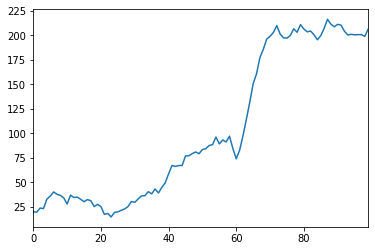

In [98]:
pd.Series(generate_stock_price(100, 20, 5)).plot()

In [45]:
np.zeros(0)

array([], dtype=float64)

In [38]:
l = np.array([1,2])

In [56]:
k.integers(3, 15)

14

In [42]:
l[0:1] += 1

In [47]:
from scipy.stats import norm

In [53]:
1- norm(0, 2.2).cdf(4)

0.03451817399720758